<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/016_dnn_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.05.13 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Monthly Revenue Forecasting with DNN - Results (2018-2022)**

### Contents

##### 1. Input Data
##### 5. Model Training
*  預先訓練多個模型並儲存
*  Training History

##### 7. Predicting Results & Feature Importance
*  Output Functions
*  DNN
*  Scores (RMSE, MAPE, MAE, MAE%)

##### 8. Plots
*  Expected v.s. Predicted
*  Scores: RMSE, MAPE, MAE, MAE%

##### 9. Best and Worst Model
*  DNN 預測最好和最差的模型組合
*  所有模型組合中，預測最好和最差的模型組合


## **0. Setup**

In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
!pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.0 MB/s eta 0:00:00


In [4]:
import import_ipynb
%cd '/content/gdrive/Shareddrives/Me/論文/code/Function'

/content/gdrive/MyDrive/論文/code/Function


In [5]:
from MonRevForecast import predictMonthlyRevenueNN, BestWorstSingleModel, trainMonthlyRevenueNN

importing Jupyter notebook from MonRevForecast.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.8 MB/s eta 0:00:00


In [6]:
from MonRevPlot import plotModelExpectedPredictedRevenues

importing Jupyter notebook from MonRevPlot.ipynb


In [7]:
from MonRevPlot import plotModelScore, modelScoreBoxplotV

In [8]:
from MonRevForecast import plotTrainingHistory

### **Project Path**

In [9]:
project_path = '/content/gdrive/Shareddrives/Me/論文'

## **1. Input Data**

【**月營收盈餘 (2013-2022)**】

資料期間：2013年1月至2022年12月（共120個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站


In [10]:
org_data = pd.read_excel(os.path.join(project_path, '資料集/007_v1/201301-202212上市櫃公司月營收_非金融業.xlsx'), index_col=0)
org_data.columns = pd.to_datetime(org_data.columns, format="%Y-%m-%d").to_period('M')
org_data

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,9134465,5540346,9457971,9919269,9543782,9517630,9875888,9835143,10060975,10654077,...,9971650,8319342,7733787,9145989,10102468,10689860,10404901,11368096,9674576,12584154
1102 亞泥,6018213,2552357,5428755,5930748,6239676,5952754,5942364,5786107,5879394,6478670,...,8160414,8710220,8000427,7776413,7864622,7069221,6994078,7601097,8306062,8340507
1103 嘉泥,288455,166638,286007,365292,382601,302995,294781,336088,314563,429783,...,220463,168089,163521,183177,178825,182371,205264,209429,221763,228644
1104 環泥,486481,299860,461732,394631,406677,415968,453397,393203,448691,521445,...,591593,638493,537082,573028,580420,605512,597159,634981,631827,725055
1108 幸福,481802,276936,444917,362054,381384,368109,439572,379115,387362,450770,...,345612,335518,332258,334113,326691,390053,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,201785,167967,240746,243935,238296,193880,198427,256724,228796,250756,...,374229,302262,323433,371791,337581,468608,464373,432835,500111,506796
9955 佳龍,394489,383183,428478,564053,336622,295391,434605,306534,266617,363766,...,96200,101850,95096,80726,85625,81881,79179,80630,91270,84115
9958 世紀鋼,198944,166364,351222,280864,289332,426371,213281,302589,401695,255738,...,626104,401960,673479,665459,651699,757968,903198,911834,944060,1082675


In [11]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1240, 120)
Data size: 148800


## **5. Model Training**

### **5.2.3 預先訓練多個模型並儲存**


In [ ]:
model_save_path_dnn = os.path.join(project_path, 'model/dnn')

In [ ]:
test_y_1 = 2018
test_y_2 = 2019
test_y_3 = 2020
test_y_4 = 2021
test_y_5 = 2022
start_m_1 = 1
end_m_1 = 6
start_m_2 = 7
end_m_2 = 12

#### **DNN**

2018 (4.1 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_1, test_y_1, end_m_1, 'dnn', model_save_path_dnn)

2018-01 model saved. Using time: 1339.871  secs.
2018-02 model saved. Using time: 1376.576  secs.
2018-03 model saved. Using time: 1330.571  secs.
2018-04 model saved. Using time: 1386.385  secs.
2018-05 model saved. Using time: 1418.254  secs.
2018-06 model saved. Using time: 1404.266  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_1, start_m_2, test_y_1, end_m_2, 'dnn', model_save_path_dnn)

2018-07 model saved. Using time: 1045.217  secs.
2018-08 model saved. Using time: 1125.536  secs.
2018-09 model saved. Using time: 1104.811  secs.
2018-10 model saved. Using time: 1050.030  secs.
2018-11 model saved. Using time: 1094.561  secs.
2018-12 model saved. Using time: 1024.222  secs.


2019 (4.7 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_1, test_y_2, end_m_1, 'dnn', model_save_path_dnn)

2019-01 model saved. Using time: 1399.469  secs.
2019-02 model saved. Using time: 1486.008  secs.
2019-03 model saved. Using time: 1469.576  secs.
2019-04 model saved. Using time: 1522.232  secs.
2019-05 model saved. Using time: 1526.996  secs.
2019-06 model saved. Using time: 1622.681  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_2, start_m_2, test_y_2, end_m_2, 'dnn', model_save_path_dnn)

2019-07 model saved. Using time: 1433.147  secs.
2019-08 model saved. Using time: 1392.849  secs.
2019-09 model saved. Using time: 1322.453  secs.
2019-10 model saved. Using time: 1282.655  secs.
2019-11 model saved. Using time: 1300.316  secs.
2019-12 model saved. Using time: 1339.357  secs.


2020 (5.5 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_1, test_y_3, end_m_1, 'dnn', model_save_path_dnn)

2020-01 model saved. Using time: 1675.502  secs.
2020-02 model saved. Using time: 1671.835  secs.
2020-03 model saved. Using time: 1712.226  secs.
2020-04 model saved. Using time: 1758.511  secs.
2020-05 model saved. Using time: 1618.183  secs.
2020-06 model saved. Using time: 1728.016  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_3, start_m_2, test_y_3, end_m_2, 'dnn', model_save_path_dnn)

2020-07 model saved. Using time: 1667.261  secs.
2020-08 model saved. Using time: 1586.816  secs.
2020-09 model saved. Using time: 1655.815  secs.
2020-10 model saved. Using time: 1613.024  secs.
2020-11 model saved. Using time: 1567.966  secs.
2020-12 model saved. Using time: 1578.561  secs.


2021 (4.8 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_1, test_y_4, end_m_1, 'dnn', model_save_path_dnn)

2021-01 model saved. Using time: 1407.803  secs.
2021-02 model saved. Using time: 1342.408  secs.
2021-03 model saved. Using time: 1295.862  secs.
2021-04 model saved. Using time: 1300.918  secs.
2021-05 model saved. Using time: 1328.770  secs.
2021-06 model saved. Using time: 1395.823  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_4, start_m_2, test_y_4, end_m_2, 'dnn', model_save_path_dnn)

2021-07 model saved. Using time: 1598.431  secs.
2021-08 model saved. Using time: 1518.852  secs.
2021-09 model saved. Using time: 1555.850  secs.
2021-10 model saved. Using time: 1529.184  secs.
2021-11 model saved. Using time: 1640.378  secs.
2021-12 model saved. Using time: 1570.673  secs.


2022 (4.5 hr. with CPU)

In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_1, test_y_5, end_m_1, 'dnn', model_save_path_dnn)

2022-01 model saved. Using time: 1095.831  secs.
2022-02 model saved. Using time: 997.039  secs.
2022-03 model saved. Using time: 1076.469  secs.
2022-04 model saved. Using time: 1054.240  secs.
2022-05 model saved. Using time: 1078.633  secs.
2022-06 model saved. Using time: 1034.918  secs.


In [ ]:
trainMonthlyRevenueNN(org_data, test_y_5, start_m_2, test_y_5, end_m_2, 'dnn', model_save_path_dnn)

2022-07 model saved. Using time: 1676.740  secs.
2022-08 model saved. Using time: 1709.148  secs.
2022-09 model saved. Using time: 1555.975  secs.
2022-10 model saved. Using time: 1638.439  secs.
2022-11 model saved. Using time: 1699.895  secs.
2022-12 model saved. Using time: 1717.096  secs.


### **5.2.4 Training History**

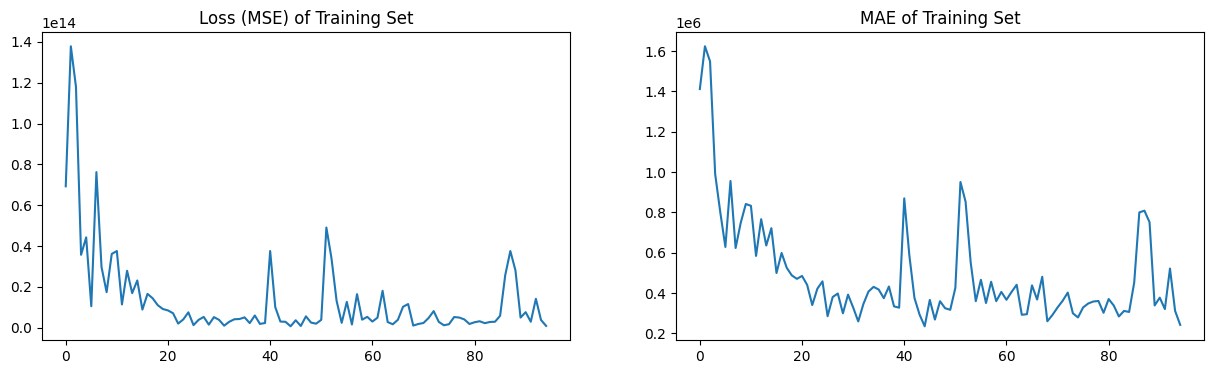

In [12]:
model_save_path_dnn = os.path.join(project_path, 'model/dnn')
plotTrainingHistory(model_save_path_dnn, '2022-12', 'model')

## **7. Predicting Results**

y_train = y_test 往前 12 個月

<br>

||訓練資料X|訓練資料y|測試資料X|測試資料y|
|---|---|---|---|---|
|Start|2013-01 - 2016-12|2017-01|2014-01 - 2017-12|**2018-01**|
|End|2017-12 - 2021-11|2021-12|2018-12 - 2022-11|**2022-12**|


In [13]:
# 訓練資料起始年
file_category = '2013'

# 預測年月
start_y = 2018
start_m = 1
end_y = 2022
end_m = 12

### **7.1 Output Functions**

In [14]:
# Output data path
output_data_path = '/content/gdrive/Shareddrives/Me/論文/Results'

In [15]:
# Output
def outputPredictingResults(category: str, modelName: str, pred: dict):
    pred['org']['org'].to_excel(os.path.join(output_data_path, f'{category}/org_pred_{modelName}_{category}.xlsx'))
    pred['org']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_pred_{modelName}_{category}.xlsx'))
    pred['org']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_pred_{modelName}_{category}.xlsx'))
    pred['def']['org'].to_excel(os.path.join(output_data_path, f'{category}/def_pred_{modelName}_{category}.xlsx'))
    pred['def']['dec'].to_excel(os.path.join(output_data_path, f'{category}/dec_def_pred_{modelName}_{category}.xlsx'))
    pred['def']['season'].to_excel(os.path.join(output_data_path, f'{category}/season_def_pred_{modelName}_{category}.xlsx'))

def outputScores(category: str, modelName: str, scoresD: pd.DataFrame):
    scoresD.to_excel(os.path.join(output_data_path, f'{category}/scores_{modelName}_{category}.xlsx'))

### **7.2 DNN**

In [16]:
# Load trained model
model_save_path_dnn = os.path.join(project_path, 'model/dnn')

In [17]:
# dnn (8 min.)
pred_dnn, scores_dnn = predictMonthlyRevenueNN(org_data, start_y, start_m, end_y, end_m, 'dnn', model_save_path_dnn)

Using time: 516.912  secs.


In [18]:
# Output
outputPredictingResults(file_category, 'dnn', pred_dnn)
outputScores(file_category, 'dnn', scores_dnn)

#### **7.2.1 Predicting Results**

In [19]:
# Original
print(pred_dnn['org']['org'].shape)
print(pred_dnn['org']['dec'].shape)
print(pred_dnn['org']['season'].shape)
pred_dnn['org']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,7714732.0,7712023.0,8094937.0,8924592.0,7631433.0,8831584.0,9944176.0,9362807.0,10101704.0,11033569.0,...,9251848.0,9669725.0,8438709.0,8259911.0,8847454.0,8642054.0,10101002.0,10421420.0,11031533.0,11873855.0
1102 亞泥,5263587.0,5222408.0,5289492.0,5885500.0,5233398.0,5793324.0,6566614.0,6346926.0,6831204.0,8093635.0,...,8093974.0,7881618.0,7359454.0,7983662.0,7821968.0,7985843.0,8806997.0,7717927.0,9148581.0,9234665.0
1103 嘉泥,211498.0,166831.0,119295.0,210508.0,118609.0,147290.0,170460.0,172567.0,237737.0,215286.0,...,180439.0,192619.0,180844.0,204667.0,171424.0,185845.0,203257.0,187243.0,217694.0,212619.0
1104 環泥,375872.0,361076.0,374188.0,401733.0,341966.0,356816.0,374868.0,383548.0,389095.0,393285.0,...,535248.0,519145.0,538675.0,607770.0,504808.0,614998.0,691370.0,594280.0,686096.0,671815.0


In [20]:
# Deflating
print(pred_dnn['def']['org'].shape)
print(pred_dnn['def']['dec'].shape)
print(pred_dnn['def']['season'].shape)
pred_dnn['def']['org'].head(4)

(1240, 60)
(1240, 60)
(1240, 60)


,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
1101 台泥,7506777.0,7557558.0,8396055.0,8657827.0,10071647.0,10704489.0,10208846.0,11068418.0,10677117.0,10269868.0,...,8854171.0,9404061.0,8804861.0,8928140.0,8082865.0,9358665.0,10595481.0,10428005.0,12092507.0,12386028.0
1102 亞泥,4935729.0,4649254.0,5842353.0,5844460.0,6679340.0,7199412.0,7134427.0,7529091.0,7197455.0,7155878.0,...,7934546.0,8078990.0,8506897.0,8278490.0,8249908.0,7447060.0,7581009.0,7388831.0,8326832.0,9613755.0
1103 嘉泥,144212.0,121384.0,197100.0,188573.0,173046.0,194576.0,178192.0,176303.0,192661.0,190310.0,...,169358.0,198181.0,173533.0,167563.0,176615.0,182027.0,188782.0,195862.0,215995.0,219666.0
1104 環泥,350398.0,337964.0,404704.0,399335.0,390372.0,424263.0,360817.0,362919.0,378310.0,389196.0,...,525295.0,561672.0,583550.0,517799.0,566211.0,562080.0,586305.0,592253.0,637378.0,656053.0


### **7.4 Scores**

In [21]:
scores_dnn

,RMSE-org,MAE-org,MAE%-org,MAPE-org,RMSE-def,MAE-def,MAE%-def,MAPE-def,RMSE-dec,MAE-dec,...,MAE%-dec_def,MAPE-dec_def,RMSE-season,MAE-season,MAE%-season,MAPE-season,RMSE-season_def,MAE-season_def,MAE%-season_def,MAPE-season_def
2018-01,1301733.0,249854.0,0.1283,0.4241,1286975.0,238369.0,0.1224,0.3024,1345128.0,261020.0,...,0.1252,4.9544,1346502.0,269393.0,0.1383,0.3874,1302474.0,243691.0,0.1251,0.2970
2018-02,1666793.0,269506.0,0.1809,0.4056,2242979.0,235805.0,0.1582,0.3858,1900071.0,266022.0,...,0.1658,0.4536,1804421.0,252560.0,0.1695,0.4146,3363558.0,360514.0,0.2419,0.5859
2018-03,1195391.0,198653.0,0.1058,0.2537,1576279.0,214838.0,0.1144,0.2752,1318069.0,224584.0,...,0.1069,0.2156,1569838.0,276777.0,0.1474,0.3588,2165070.0,265164.0,0.1412,0.3202
2018-04,1915801.0,258311.0,0.1440,0.3346,848814.0,156882.0,0.0875,0.3645,941058.0,231761.0,...,0.1176,0.3608,923630.0,228755.0,0.1275,0.2699,1765002.0,228703.0,0.1275,0.4747
2018-05,933367.0,203271.0,0.1074,0.2174,496266.0,131636.0,0.0695,0.1774,736381.0,187218.0,...,0.0669,0.2215,1141035.0,285461.0,0.1508,0.2845,2043322.0,241084.0,0.1273,0.2724
2018-06,2446035.0,252189.0,0.1317,0.2827,1112030.0,170894.0,0.0893,0.2746,1555312.0,226093.0,...,0.0885,0.3650,1591556.0,304306.0,0.1589,0.3079,1860190.0,243311.0,0.1271,0.3338
2018-07,1180320.0,186264.0,0.0946,0.3081,1304217.0,162937.0,0.0828,0.3593,823895.0,209161.0,...,0.0641,0.3814,883398.0,231908.0,0.1178,0.4409,1726982.0,191657.0,0.0974,0.4260
2018-08,999119.0,184281.0,0.0895,0.2121,962483.0,146317.0,0.0711,0.2203,925477.0,177277.0,...,0.0942,0.7296,1201468.0,282498.0,0.1372,0.2829,1804803.0,204917.0,0.0995,0.4014
2018-09,2632168.0,259254.0,0.1161,0.3021,2759835.0,199479.0,0.0893,0.2182,1857302.0,249742.0,...,0.0941,0.3642,3893227.0,348663.0,0.1562,0.4097,3475910.0,280994.0,0.1259,0.2764
2018-10,994947.0,241306.0,0.1054,0.3226,3212607.0,274434.0,0.1198,0.1902,1307316.0,214859.0,...,0.0905,0.3467,4364256.0,384070.0,0.1677,0.3749,4744509.0,372012.0,0.1625,0.2121


## **8. Plots**


### **8.1 Expected v.s. Predicted**

#### **8.1.2 分模型畫圖**

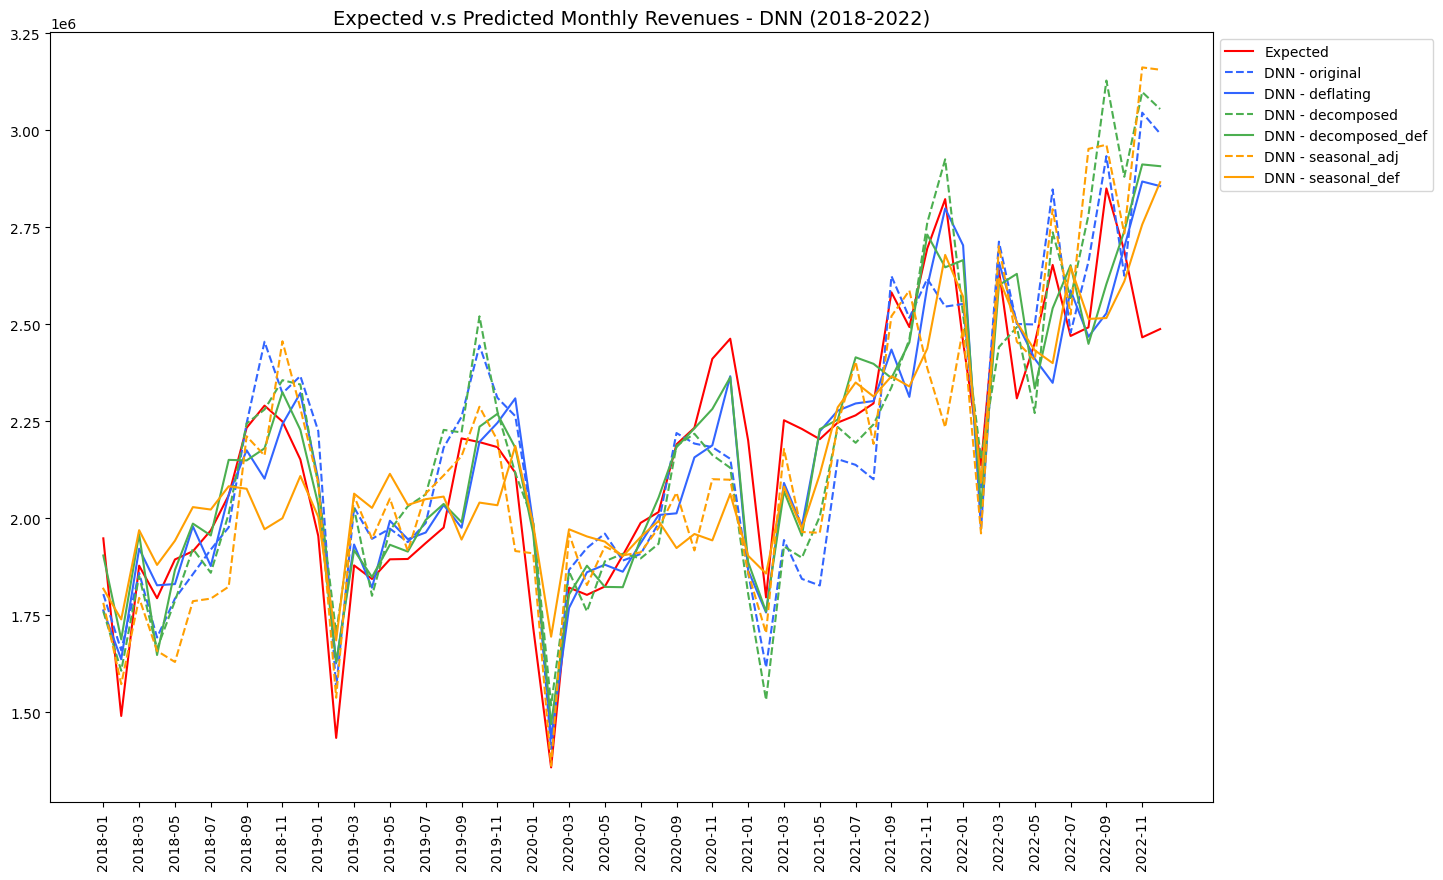

In [22]:
plotModelExpectedPredictedRevenues(org_data, pred_dnn, 'dnn', start_y)

### **8.2 Scores: RMSE, MAPE, MAE, MAE%**

*   RMSE (Root Mean Square Error)

  $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2}$

<br>

*   MAE (Mean Absolute Error)

  $MAE = \frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|$

<br>

*   MAE% (MAE / mean of the sum of y_true)

  $MAE\% = \frac{\frac{1}{n}\sum_{i=1}^n|\hat{y}_i - y_i|}{\frac{1}{n}\sum_{i=1}^n y_i} = \frac{\sum_{i=1}^n|\hat{y}_i - y_i|}{\sum_{i=1}^n y_i}$

<br>

*   MAPE (Mean Absolute Percentage Error)

  $MAPE(\%) = \frac{1}{n}\sum_{i=1}^n \frac{|\hat{y}_i - y_i|}{y_i}$


#### **8.2.2 分模型畫圖**

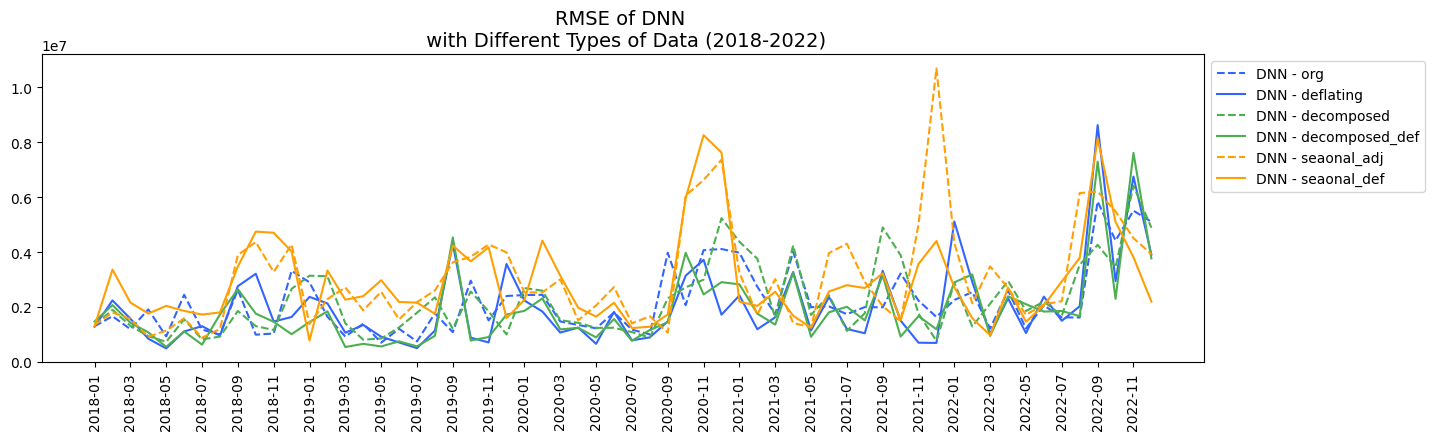

In [23]:
# RMSE
plotModelScore(scores_dnn, 'DNN', 'RMSE', start_y)

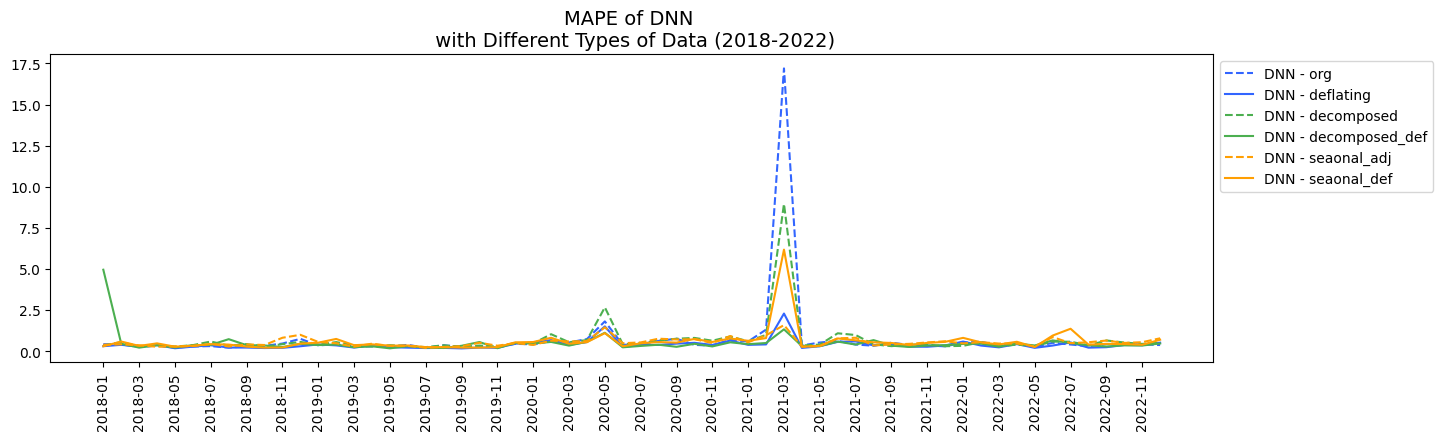

In [24]:
# MAPE
plotModelScore(scores_dnn, 'DNN', 'MAPE', start_y)

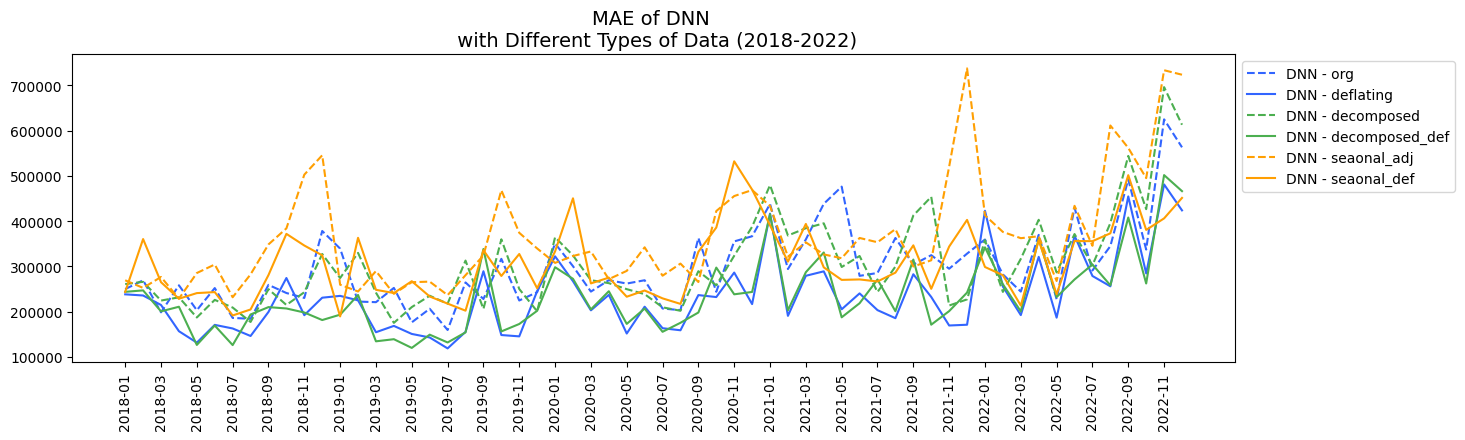

In [25]:
# MAE
plotModelScore(scores_dnn, 'DNN', 'MAE', start_y)

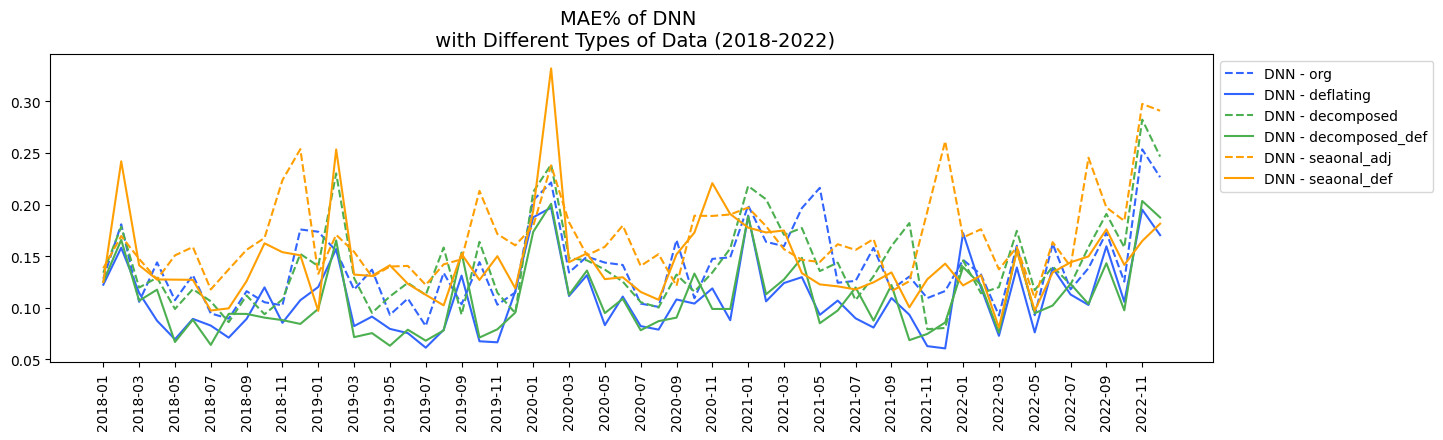

In [26]:
# MAE%
plotModelScore(scores_dnn, 'DNN', 'MAE%', start_y)

#### **8.2.3 Boxplot**

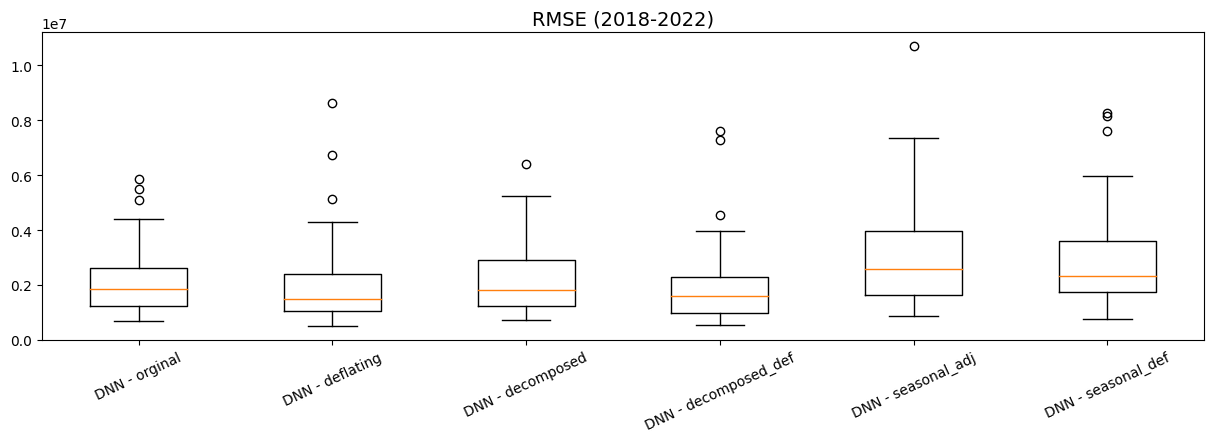

In [27]:
# RMSE
modelScoreBoxplotV(scores_dnn, 'RMSE', start_y) 

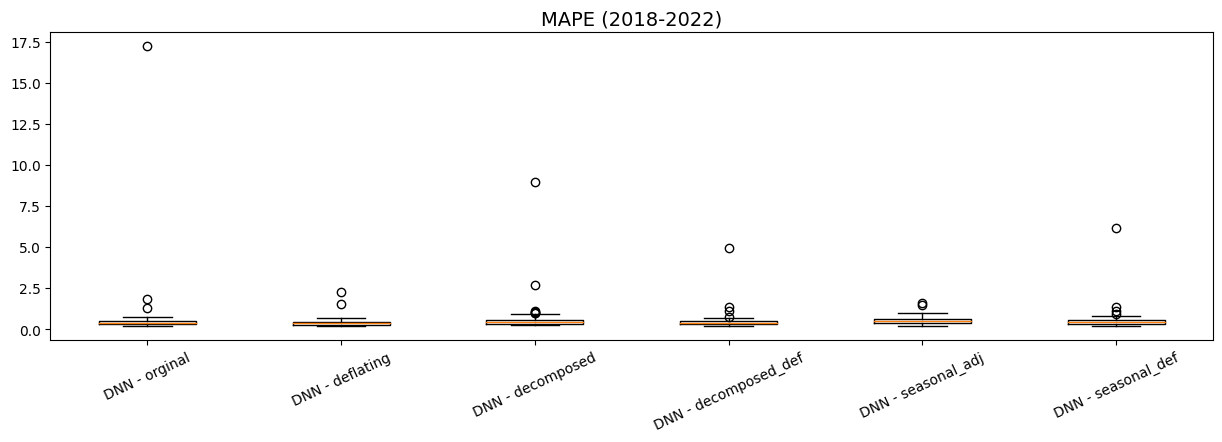

In [28]:
# MAPE
modelScoreBoxplotV(scores_dnn, 'MAPE', start_y) 

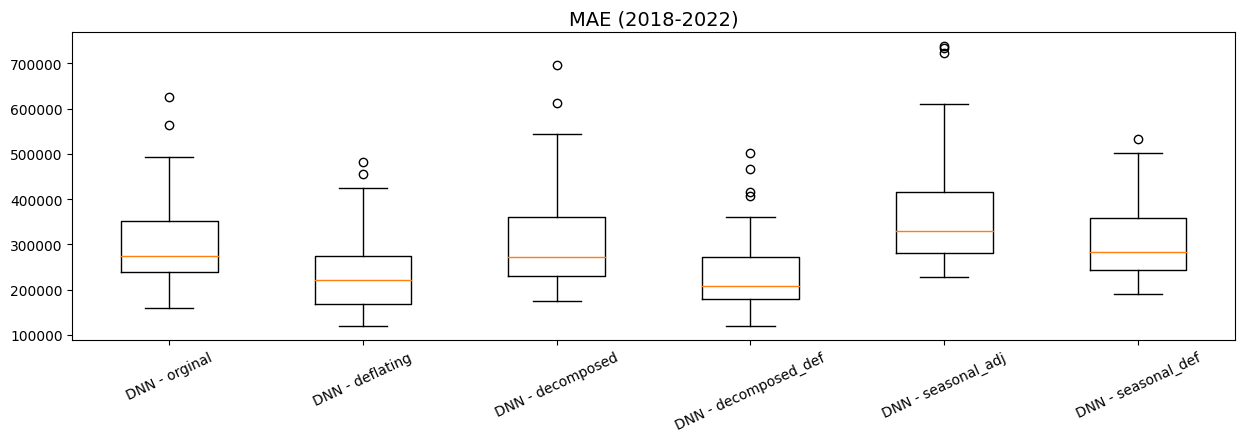

In [29]:
# MAE
modelScoreBoxplotV(scores_dnn, 'MAE', start_y) 

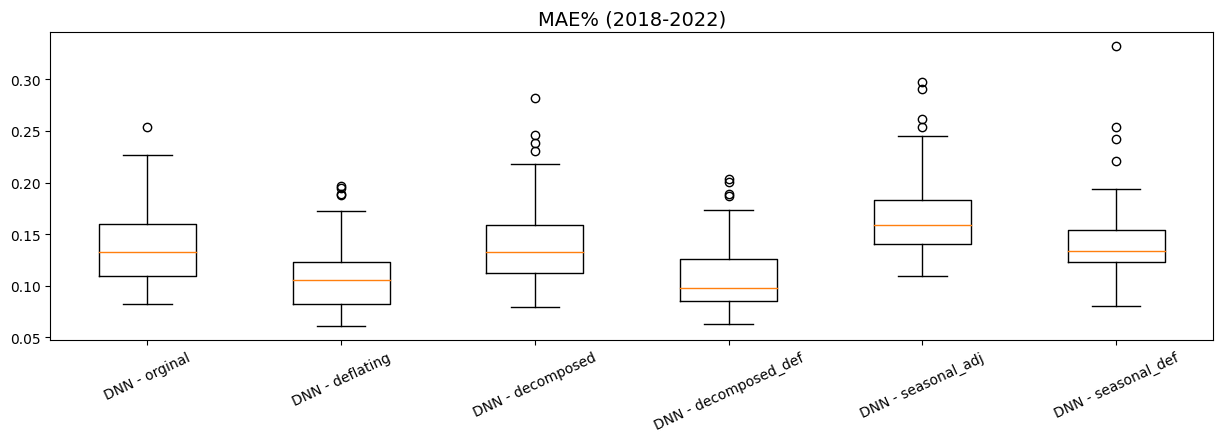

In [30]:
# MAE%
modelScoreBoxplotV(scores_dnn, 'MAE%', start_y) 

## **9. Best and Worst Model**

In [31]:
bw = BestWorstSingleModel(scores_dnn, 'DNN')

### **9.1 各模型組合中，預測最好和最差的月份**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|6|4|2 (fixed)|1x6x4x2 = 48|

#### **9.1.1 RMSE**

In [32]:
best_rmse, worst_rmse = bw.findBestWorstForAll('RMSE')

##### **最佳月份**

In [33]:
best_rmse

,modelName,dataType,scoreType,min_month,min_score
0,DNN,org,RMSE,2019-05,706223.0
4,DNN,def,RMSE,2018-05,496266.0
8,DNN,dec,RMSE,2018-05,736381.0
12,DNN,dec_def,RMSE,2019-03,546931.0
16,DNN,season,RMSE,2018-07,883398.0
20,DNN,season_def,RMSE,2019-01,783023.0


##### **最差月份**

In [34]:
worst_rmse

,modelName,dataType,scoreType,max_month,max_score
0,DNN,org,RMSE,2022-09,5841734.0
4,DNN,def,RMSE,2022-09,8620857.0
8,DNN,dec,RMSE,2022-11,6411706.0
12,DNN,dec_def,RMSE,2022-11,7607098.0
16,DNN,season,RMSE,2021-12,10682784.0
20,DNN,season_def,RMSE,2020-11,8253864.0


#### **9.1.2 MAPE**

In [35]:
best_mape, worst_mape = bw.findBestWorstForAll('MAPE')

##### **最佳月份**

In [36]:
best_mape

,modelName,dataType,scoreType,min_month,min_score
3,DNN,org,MAPE,2019-07,0.1973
7,DNN,def,MAPE,2019-09,0.1680
11,DNN,dec,MAPE,2019-07,0.2448
15,DNN,dec_def,MAPE,2019-05,0.1719
19,DNN,season,MAPE,2019-07,0.2017
23,DNN,season_def,MAPE,2018-10,0.2121


##### **最差月份**

In [37]:
worst_mape

,modelName,dataType,scoreType,max_month,max_score
3,DNN,org,MAPE,2021-03,17.2014
7,DNN,def,MAPE,2021-03,2.2887
11,DNN,dec,MAPE,2021-03,8.9584
15,DNN,dec_def,MAPE,2018-01,4.9544
19,DNN,season,MAPE,2021-03,1.5860
23,DNN,season_def,MAPE,2021-03,6.1774


#### **9.1.3 MAE**

In [38]:
best_mae, worst_mae = bw.findBestWorstForAll('MAE')

##### **最佳月份**

In [39]:
best_mae

,modelName,dataType,scoreType,min_month,min_score
1,DNN,org,MAE,2019-07,159598.0
5,DNN,def,MAE,2019-07,118886.0
9,DNN,dec,MAE,2019-04,175334.0
13,DNN,dec_def,MAE,2019-05,119973.0
17,DNN,season,MAE,2018-04,228755.0
21,DNN,season_def,MAE,2019-01,189575.0


##### **最差月份**

In [40]:
worst_mae

,modelName,dataType,scoreType,max_month,max_score
1,DNN,org,MAE,2022-11,625022.0
5,DNN,def,MAE,2022-11,481209.0
9,DNN,dec,MAE,2022-11,696229.0
13,DNN,dec_def,MAE,2022-11,501851.0
17,DNN,season,MAE,2021-12,737631.0
21,DNN,season_def,MAE,2020-11,532304.0


#### **9.1.3 MAE%**

In [41]:
best_mae_p, worst_mae_p = bw.findBestWorstForAll('MAE%')

##### **最佳月份**

In [42]:
best_mae_p

,modelName,dataType,scoreType,min_month,min_score
2,DNN,org,MAE%,2019-07,0.0824
6,DNN,def,MAE%,2021-12,0.0607
10,DNN,dec,MAE%,2021-11,0.0793
14,DNN,dec_def,MAE%,2019-05,0.0633
18,DNN,season,MAE%,2022-05,0.1092
22,DNN,season_def,MAE%,2022-03,0.0809


##### **最差月份**

In [43]:
worst_mae_p

,modelName,dataType,scoreType,max_month,max_score
2,DNN,org,MAE%,2022-11,0.2535
6,DNN,def,MAE%,2020-02,0.1970
10,DNN,dec,MAE%,2022-11,0.2823
14,DNN,dec_def,MAE%,2022-11,0.2035
18,DNN,season,MAE%,2022-11,0.2975
22,DNN,season_def,MAE%,2020-02,0.3319


### **9.2 DNN 預測最好和最差的模型組合**

||modelType|dataType|scoreType|Best & Worst Month|Total|
|-|-|-|-|-|-|
|Numbers|1|1|4|2 (fixed)|1x1x4x2 = 8|

#### **9.2.1 RMSE**

##### **最佳模型**

In [44]:
bw.best['RMSE']

,modelName,dataType,scoreType,min_month,min_score
4,DNN,def,RMSE,2018-05,496266.0


##### **最差模型**

In [45]:
bw.worst['RMSE']

,modelName,dataType,scoreType,max_month,max_score
16,DNN,season,RMSE,2021-12,10682784.0


#### **9.2.2 MAPE**

##### **最佳模型**

In [46]:
bw.best['MAPE']

,modelName,dataType,scoreType,min_month,min_score
7,DNN,def,MAPE,2019-09,0.168


##### **最差模型**

In [47]:
bw.worst['MAPE']

,modelName,dataType,scoreType,max_month,max_score
3,DNN,org,MAPE,2021-03,17.2014


#### **9.2.3 MAE**

##### **最佳模型**

In [48]:
bw.best['MAE']

,modelName,dataType,scoreType,min_month,min_score
5,DNN,def,MAE,2019-07,118886.0


##### **最差模型**

In [49]:
bw.worst['MAE']

,modelName,dataType,scoreType,max_month,max_score
17,DNN,season,MAE,2021-12,737631.0


#### **9.2.4 MAE%**

##### **最佳模型**

In [50]:
bw.best['MAE%']

,modelName,dataType,scoreType,min_month,min_score
6,DNN,def,MAE%,2021-12,0.0607


##### **最差模型**

In [51]:
bw.worst['MAE%']

,modelName,dataType,scoreType,max_month,max_score
22,DNN,season_def,MAE%,2020-02,0.3319
